In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import joblib  # For saving the model

CPU times: user 833 ms, sys: 477 ms, total: 1.31 s
Wall time: 602 ms


In [6]:
%%time

# Loading the dataset
path = 'https://storage.googleapis.com/msca-bdp-data-open/yelp/yelp_train_sentiment.json'
yelp = pd.read_json(path, orient='records', lines=True)

CPU times: user 1.53 s, sys: 487 ms, total: 2.02 s
Wall time: 2.94 s


In [4]:
yelp.head()

,text,label,lang
0,I love Deagan's. I do. I really do. The atmosp...,1,en
1,I love the classes at this gym. Zumba and. Rad...,1,en
2,The tables and floor were dirty. I was the onl...,0,en
3,I had an oil change at the 15515 N Scottsdale ...,0,en
4,The absolute WORST apartment complex I have ev...,0,en


In [7]:
%%time


# Define X and y from the sampled dataset
X = yelp['text']
y = yelp['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

CPU times: user 32.9 ms, sys: 0 ns, total: 32.9 ms
Wall time: 31.1 ms


In [46]:
%%time

# Define models and vectorizers
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'SVM': SGDClassifier(max_iter=100, tol=None)
}

vectorizers = {
    'CountVectorizer': CountVectorizer(stop_words='english', ngram_range=(1,3)),
    'TfidfVectorizer': TfidfVectorizer(stop_words='english', ngram_range=(1,3))
}

CPU times: user 103 µs, sys: 0 ns, total: 103 µs
Wall time: 107 µs


In [47]:
%%time

# Initialize dictionary to store average cross-validation scores
cv_scores = {}

# Loop through each combination of model and vectorizer
for vect_name, vect in vectorizers.items():
    for model_name, model in models.items():
        pipeline = make_pipeline(vect, model)
        cv_score = np.mean(cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy'))
        cv_scores[f'{model_name} with {vect_name}'] = cv_score
        print(f'{model_name} with {vect_name}: Average CV Accuracy = {cv_score:.4f}\n')

# Find the best model and vectorizer combination
best_model_name = max(cv_scores, key=cv_scores.get)
print(f'Best Model: {best_model_name} with an average accuracy of {cv_scores[best_model_name]:.4f}')

MultinomialNB with CountVectorizer: Average CV Accuracy = 0.9418

LogisticRegression with CountVectorizer: Average CV Accuracy = 0.9709

SVM with CountVectorizer: Average CV Accuracy = 0.9709

MultinomialNB with TfidfVectorizer: Average CV Accuracy = 0.9430

LogisticRegression with TfidfVectorizer: Average CV Accuracy = 0.9635

SVM with TfidfVectorizer: Average CV Accuracy = 0.9580

Best Model: SVM with CountVectorizer with an average accuracy of 0.9709
CPU times: user 2h 6min 38s, sys: 54min 2s, total: 3h 40s
Wall time: 1h 30min 7s


In [50]:
%%time

# Train the best model on the entire training dataset
best_vect_name = best_model_name.split(' with ')[1]
best_model = models[best_model_name.split(' ')[0]]
pipeline = make_pipeline(vectorizers[best_vect_name], best_model)
pipeline.fit(X_train, y_train)

# Save the final model
joblib.dump(pipeline, './models/best_sentiment_model.joblib')

CPU times: user 3min 54s, sys: 5.51 s, total: 4min
Wall time: 4min 3s


['./models/best_sentiment_model.joblib']

Test Accuracy: 97.18%


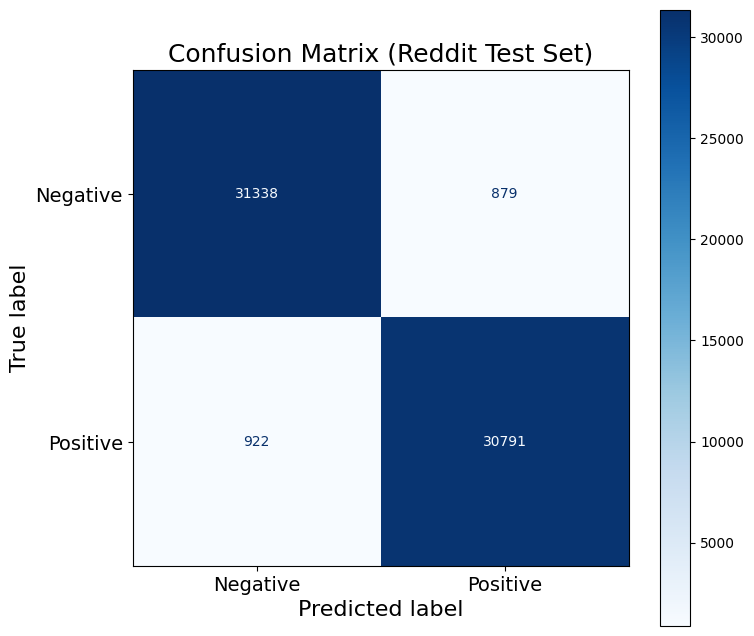

In [10]:
# %%time

# # Load the saved model from the 'models' directory
# pipeline_loaded = joblib.load('./models/best_sentiment_model.joblib')

# # Evaluate the loaded model on the test set
# y_pred = pipeline_loaded.predict(X_test)
# print(f'Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

# # Print a clean confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()



import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are already defined

# Load the saved model from the 'models' directory
pipeline_loaded = joblib.load('./models/best_sentiment_model.joblib')

# Evaluate the loaded model on the test set
y_pred = pipeline_loaded.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline_loaded.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])

# Plot with adjustments
fig, ax = plt.subplots(figsize=(8, 8))  # Increase figure size for better readability
disp.plot(cmap=plt.cm.Blues, ax=ax)
disp.ax_.set_title('Confusion Matrix (Reddit Test Set)', fontsize=18)  # Add title and adjust font size
disp.ax_.set_xlabel('Predicted label', fontsize=16)  # Increase font size for x-axis label
disp.ax_.set_ylabel('True label', fontsize=16)  # Increase font size for y-axis label
plt.xticks(fontsize=14)  # Increase font size for x-axis ticks
plt.yticks(fontsize=14)  # Increase font size for y-axis ticks
plt.show()


In [2]:
import pandas as pd

df = pd.read_parquet('./data/news_final_project_clean.parquet')

df.head()

,url,date,language,title,text,token_count,cleaned_text
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,951,LegalTech AI Market 2019 Technology Advancemen...
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,1567,Children With Autism Saw Their Learning and So...
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,2055,Covid-19: un messaggio dai ricercatori italian...
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,266,Two dead as AI Express flight skids off Kozhik...
5,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...",328,"Native Stew - Bahamas AI Art, Photos, Videos: ..."
